In [1]:
# Importation of librarires and modules

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#import datetime as dt

In [2]:
# Load dataset from respective folder

df=pd.read_csv(Path('./datasets/sp500indexand11sectors/S5HLTH INDEX.csv'))

In [3]:
# Filtering out 'Open', 'High', 'Low' columns as we are not going to utilize them in analysis

df=df.drop(columns=['Open','High','Low'])

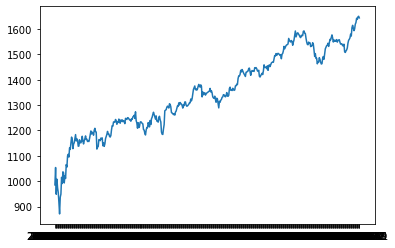

In [4]:
# Overview of graph

plt.plot(df.Date,df.Close)

In [5]:
# Reshape into correct format

x=np.arange(df['Date'].size).reshape(-1,1)

In [6]:
# Checking reshaped

x.shape

(458, 1)

In [7]:
# Split

y=df.Close

In [8]:
# Create an instance of the linear regression model

model=LinearRegression()

In [9]:
# Fitting and training

model.fit(x,y)

LinearRegression()

In [10]:
# Fit and Predict

y_pred = model.predict(x)

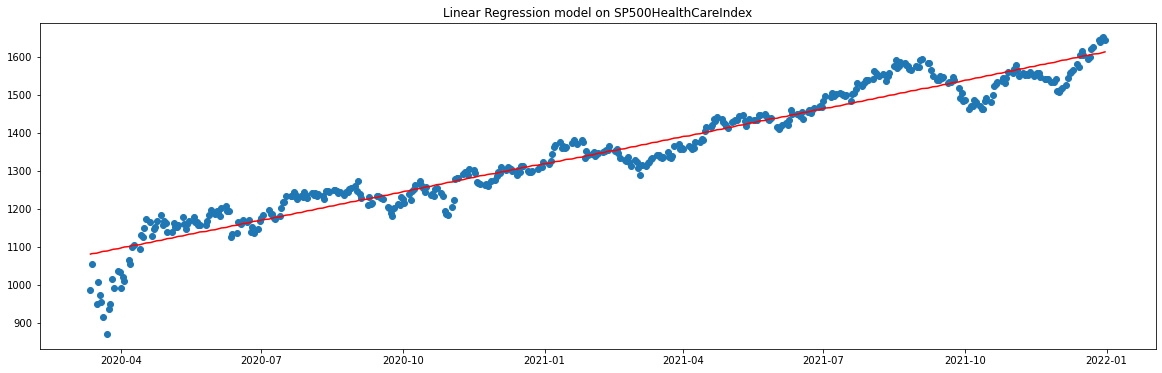

In [11]:
# Graphing out the raw data points, and their predictions in red linear.

plt.rcParams["figure.figsize"] = (20,6)
df['Date'] = pd.to_datetime(df['Date'])    # Reformating the column from object to datetime datatype.
plt.scatter(df.Date,y)
plt.plot(df.Date,y_pred,color='red')
plt.title("Linear Regression model on SP500HealthCareIndex")
plt.show()

In [12]:
# Adding prediction column to dataset.

df["Pred_Price"]=y_pred

In [13]:
df.head()

,Date,Close,Pred_Price
0,2020-03-12,985.40,1081.009890
1,2020-03-13,1053.92,1082.173030
2,2020-03-16,948.61,1083.336169
3,2020-03-17,1007.95,1084.499309
4,2020-03-18,973.71,1085.662449


In [14]:
# Coefficient and interceiption of the linear model

print("Linear Regression model: y = mx + b")
print("where m =", round(model.coef_[0],2), "and b =", round(model.intercept_,2))

Linear Regression model: y = mx + b
where m = 1.16 and b = 1081.01


In [15]:
# Mean Squared Error of estimator. 
# (The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, 
# it is always a positive value that decreases as the error approaches zero) Per Wiki. 

mean_squared_error(y,y_pred)

1712.621918408985

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9324717200447334